In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#importing the urnings algortihm
import main_urnings as mu

In [22]:
#np.random.seed(12312312)
#game settings
n_player = 5000
n_items = 1000
starting_score = 3
player_urn_sizes = 6
item_urn_sizes = 1000
n_sim = 300

#true scores for players and items
item_true_values = np.random.uniform(0.1, 0.9, n_items)

#creating players and items
players = []
for i in range(n_player):
    player = mu.Player(user_id = "Student", score = starting_score, urn_size = player_urn_sizes, true_value = 0.6, so_score=10)
    players.append(player)

items = []
for i in range(n_items):
    iname = "item" + str(i)
    starting_score = np.random.binomial(item_urn_sizes, item_true_values[i])
    item = mu.Player(user_id = iname, score = starting_score, urn_size = item_urn_sizes, true_value = item_true_values[i])
    items.append(item)


adaptive_rule = mu.Game_Type(adaptivity="n_adaptive", alg_type="Urnings2")
adaptive_sim = mu.Urnings(players = players, items = items, game_type=adaptive_rule)

In [23]:
adaptive_sim.play(n_games=n_sim, test = True)

In [24]:
urnings_matrix = np.zeros((n_player, n_sim + 1))
for pl in range(n_player):
    row = players[pl].container
    urnings_matrix[pl,:] = row


print(urnings_matrix / player_urn_sizes)

np.savetxt("urnings_matrix_5_10_nochange.csv", urnings_matrix, delimiter=",")

[[0.5        0.33333333 0.33333333 ... 0.5        0.66666667 0.66666667]
 [0.5        0.33333333 0.5        ... 0.66666667 0.66666667 0.66666667]
 [0.5        0.5        0.33333333 ... 0.66666667 0.66666667 0.5       ]
 ...
 [0.5        0.33333333 0.33333333 ... 0.16666667 0.         0.16666667]
 [0.5        0.5        0.66666667 ... 0.16666667 0.33333333 0.33333333]
 [0.5        0.5        0.5        ... 0.5        0.5        0.33333333]]


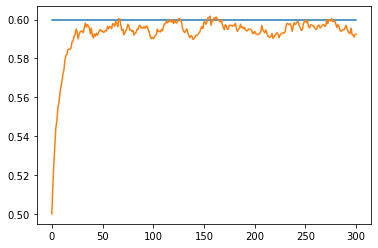

In [26]:
col_means = np.mean(urnings_matrix, axis = 0) / player_urn_sizes
col_var = np.std(urnings_matrix, axis = 0) / np.sqrt(n_player)

col_lower = np.zeros(len(col_means))
col_upper = np.zeros(len(col_means))
for i in range(len(col_means)):
    confint = np.percentile(urnings_matrix[:,i] / player_urn_sizes, [5, 95])
    col_lower[i] = confint[0]
    col_upper[i] = confint[1]


plt.plot(np.repeat(0.6, len(col_means)))
plt.plot(col_means)
#plt.fill_between(x, col_upper, col_lower)


In [16]:
#np.random.seed(12312312)
#game settings
n_player = 5000
n_items = 1000
starting_score = 5
player_urn_sizes = 10
item_urn_sizes = 100
n_sim = 100

#true scores for players and items
item_true_values = np.random.uniform(0.1, 0.9, n_items)

#creating players and items
players = []
for i in range(n_player):
    player = mu.Player(user_id = "Student", score = starting_score, urn_size = player_urn_sizes, true_value = 0.5, so_score=10)
    players.append(player)

items = []
for i in range(n_items):
    iname = "item" + str(i)
    item_starting_score = np.random.binomial(item_urn_sizes, item_true_values[i])
    item = mu.Player(user_id = iname, score = item_starting_score, urn_size = item_urn_sizes, true_value = item_true_values[i])
    items.append(item)


adaptive_rule = mu.Game_Type(adaptivity="adaptive", alg_type="Urnings2")
adaptive_sim = mu.Urnings(players = players, items = items, game_type=adaptive_rule)

In [17]:
growth = np.zeros(n_sim)
for i in range(n_sim):
    adaptive_sim.play(n_games=1, test = True)
    growth[i] = players[0].true_value
    for pl in players:
        pl.true_value += 0.0001
        

In [8]:
urnings_matrix = np.zeros((n_player, n_sim + 1))
for pl in range(n_player):
    row = players[pl].container
    urnings_matrix[pl,:] = row


print(urnings_matrix / player_urn_sizes)

np.savetxt("urnings_matrix_5_10_change.csv", urnings_matrix, delimiter=",")

[[0.5 0.5 0.6 ... 0.4 0.5 0.4]
 [0.5 0.5 0.5 ... 0.4 0.5 0.6]
 [0.5 0.5 0.5 ... 0.5 0.6 0.7]
 ...
 [0.5 0.5 0.5 ... 0.7 0.8 0.8]
 [0.5 0.4 0.4 ... 0.5 0.5 0.4]
 [0.5 0.5 0.5 ... 0.4 0.5 0.4]]


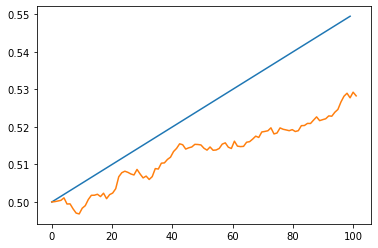

In [9]:
col_means = np.mean(urnings_matrix, axis = 0) / player_urn_sizes
col_var = np.std(urnings_matrix, axis = 0) / np.sqrt(n_player)

col_lower = np.zeros(len(col_means))
col_upper = np.zeros(len(col_means))
for i in range(len(col_means)):
    confint = np.percentile(urnings_matrix[:,i] / player_urn_sizes, [10, 90])
    col_lower[i] = confint[0]
    col_upper[i] = confint[1]


x = np.linspace(0, 101, 101)

plt.plot(growth)
plt.plot(x,col_means)
#plt.fill_between(x, col_upper, col_lower)

In [172]:
#np.random.seed(12312312)
#game settings
n_player = 100
n_items = 100000
starting_score = 6
player_urn_sizes = 12
item_urn_sizes = 100000
n_sim = 100

#true scores for players and items
item_true_values = np.random.uniform(0.1, 0.9, n_items)

#creating players and items
players = []
for i in range(n_player):
    player = mu.Player(user_id = "Student", score = starting_score, urn_size = player_urn_sizes, true_value = 0.5, so_score=10)
    players.append(player)

items = []
for i in range(n_items):
    iname = "item" + str(i)

    item = mu.Player(user_id = iname, score = np.round(item_true_values[i], 1) * item_urn_sizes, urn_size = item_urn_sizes, true_value = item_true_values[i])
    items.append(item)


adaptive_rule = mu.Game_Type(adaptivity="n_adaptive", alg_type="Urnings1")
adaptive_sim = mu.Urnings(players = players, items = items, game_type=adaptive_rule)

growth = np.zeros(n_sim)
for i in range(n_sim):
    adaptive_sim.play(n_games=1, test = True)
    growth[i] = players[0].true_value

    if i % 40 == 0:
        for pl in players:
            pl.true_value += 0.025
        

[[0.5        0.5        0.5        ... 0.66666667 0.66666667 0.66666667]
 [0.5        0.5        0.5        ... 0.5        0.5        0.5       ]
 [0.5        0.58333333 0.5        ... 0.41666667 0.41666667 0.41666667]
 ...
 [0.5        0.5        0.5        ... 0.75       0.75       0.75      ]
 [0.5        0.5        0.41666667 ... 0.5        0.58333333 0.66666667]
 [0.5        0.5        0.5        ... 0.16666667 0.25       0.25      ]]


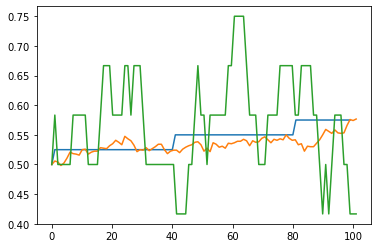

In [177]:
urnings_matrix = np.zeros((n_player, n_sim + 1))
for pl in range(n_player):
    row = players[pl].container
    urnings_matrix[pl,:] = row

col_means = np.mean(urnings_matrix, axis = 0) / player_urn_sizes
col_var = np.std(urnings_matrix, axis = 0) / np.sqrt(n_player)

col_lower = np.zeros(len(col_means))
col_upper = np.zeros(len(col_means))
for i in range(len(col_means)):
    confint = np.percentile(urnings_matrix[:,i] / player_urn_sizes, [10, 90])
    col_lower[i] = confint[0]
    col_upper[i] = confint[1]


x = np.linspace(0, 101, 101)

plt.plot(growth)
plt.plot(x,col_means)
plt.plot(x, urnings_matrix[2,:] / player_urn_sizes)
#plt.fill_between(x, col_upper, col_lower)

SHOWCASING THE RESULTS OF THE SIMULATION

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#importing the urnings algortihm
import main_urnings as mu

#parameters
player_urn_sizes = [6, 10, 14, 18, 50]
true_value = [0.6, 0.7, 0.8, 0.9]

#fixed parameters
n_player = 10
n_items = 1000
item_urn_sizes = 100
n_sim = 10
true_value = 0.5

#container for the results
urnings_array = np.zeros((n_player, n_sim + 1, 20))

counter = 0

In [44]:
urnings_limit_sim = np.load("urnings_array_limit.npy")

0.7 10.0


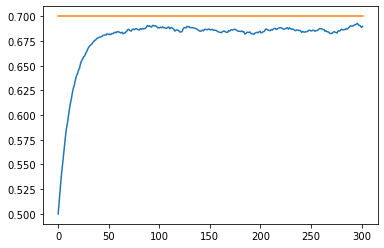

In [47]:
player_urn_sizes = [6, 10, 14, 18, 50]
true_value = [0.6, 0.7, 0.8, 0.9]

settings = np.zeros((20, 2))

counter = 0
for ch in range(len(true_value)):
    for pus in range(len(player_urn_sizes)):
        settings[counter, :] = true_value[ch], player_urn_sizes[pus]
        counter += 1

settings

urnings_matrix = urnings_limit_sim[:,:,6]

true_value, player_urn_size = settings[6,:]
print(true_value, player_urn_size)

n_player = 5000

col_means = np.mean(urnings_matrix, axis = 0) / player_urn_size

x = np.linspace(0, 301, 301)

plt.plot(x,col_means)
plt.plot(x, np.repeat(true_value, len(col_means)))

In [48]:
urnings_limit_sim = np.load("urnings_array_limit_change_adaptive.npy")

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#importing the urnings algortihm
import main_urnings as mu

#parameters
player_urn_sizes = [6, 10, 14, 18, 50]
change = [0.0001, 0.0005, 0.001, 0.002]

#fixed parameters
n_player = 10
n_items = 1000
item_urn_sizes = 100
n_sim = 10
true_value = 0.5

#container for the results
urnings_array = np.zeros((n_player, n_sim + 1, len(change) * len(player_urn_sizes)))

counter = 0

In [50]:
player_urn_sizes = [6, 10, 14, 18, 50]
change = [0.0001, 0.0005, 0.001, 0.002]

settings = np.zeros((20, 2))

counter = 0
for ch in range(len(change)):
    for pus in range(len(player_urn_sizes)):
        settings[counter, :] = change[ch], player_urn_sizes[pus]
        counter += 1

settings


array([[1.0e-04, 6.0e+00],
       [1.0e-04, 1.0e+01],
       [1.0e-04, 1.4e+01],
       [1.0e-04, 1.8e+01],
       [1.0e-04, 5.0e+01],
       [5.0e-04, 6.0e+00],
       [5.0e-04, 1.0e+01],
       [5.0e-04, 1.4e+01],
       [5.0e-04, 1.8e+01],
       [5.0e-04, 5.0e+01],
       [1.0e-03, 6.0e+00],
       [1.0e-03, 1.0e+01],
       [1.0e-03, 1.4e+01],
       [1.0e-03, 1.8e+01],
       [1.0e-03, 5.0e+01],
       [2.0e-03, 6.0e+00],
       [2.0e-03, 1.0e+01],
       [2.0e-03, 1.4e+01],
       [2.0e-03, 1.8e+01],
       [2.0e-03, 5.0e+01]])

0.0005 10.0


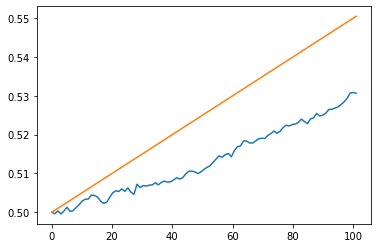

In [51]:
urnings_matrix = urnings_limit_sim[:,:,6]

change, player_urn_size = settings[6,:]
print(change, player_urn_size)

n_player = 5000

col_means = np.mean(urnings_matrix, axis = 0) / player_urn_size

x = np.linspace(0, 101, 101)

plt.plot(x,col_means)
plt.plot(x, x*change + 0.5)

PAIRED UPDATE FIRST TEST

In [1]:
import numpy as np
import main_urnings as mu
#np.random.seed(12312312)
#game settings
n_player = 100
n_items = 1000
starting_score = 5
player_urn_sizes = 16
item_urn_sizes = 100
n_sim = 1000

#true scores for players and items
item_true_values = np.random.uniform(0.1, 0.9, n_items)


#creating players and items
players = []
for i in range(n_player):
    player = mu.Player(user_id = "Student", score = starting_score, urn_size = player_urn_sizes, true_value = 0.6)
    players.append(player)

items = []
for i in range(n_items):
    iname = "item" + str(i)
    starting_score = np.random.binomial(item_urn_sizes, item_true_values[i])
    item = mu.Player(user_id = iname, score = starting_score, urn_size = item_urn_sizes, true_value = item_true_values[i])
    items.append(item)


adaptive_rule = mu.Game_Type(adaptivity="n_adaptive", alg_type="Urnings2", paired_update=True)
adaptive_sim = mu.Urnings(players = players, items = items, game_type=adaptive_rule)
adaptive_sim.play(n_games=n_sim, test=True)

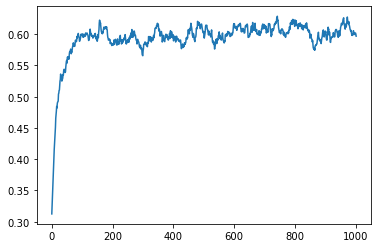

In [2]:
import matplotlib.pyplot as plt

urnings_matrix = np.zeros((n_player, n_sim + 1))
for pl in range(n_player):
    row = players[pl].container
    urnings_matrix[pl,:] = row

col_means = np.mean(urnings_matrix, axis = 0) / player_urn_sizes
col_var = np.std(urnings_matrix, axis = 0) / np.sqrt(n_player)

col_lower = np.zeros(len(col_means))
col_upper = np.zeros(len(col_means))
for i in range(len(col_means)):
    confint = np.percentile(urnings_matrix[:,i] / player_urn_sizes, [10, 90])
    col_lower[i] = confint[0]
    col_upper[i] = confint[1]


x = np.linspace(0, 1001, 1001)

plt.plot(x,col_means)

STAKES TRIAL

8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8 8 True
8

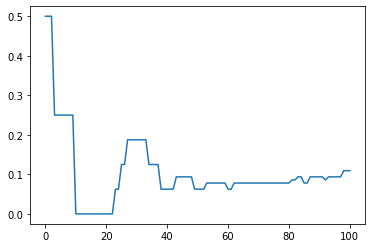

In [1]:
import numpy as np
import main_urnings as mu
import matplotlib.pyplot as plt
#np.random.seed(12312312)
#game settings
n_player = 100
n_items = 1000
starting_score = 2
player_urn_sizes = 4
item_urn_sizes = 100
n_sim = 100

#true scores for players and items
item_true_values = np.random.uniform(0.1, 0.9, n_items)


#creating players and items
players = []
for i in range(n_player):
    player = mu.Player(user_id = "Student", score = starting_score, urn_size = player_urn_sizes, true_value = 0.1)
    players.append(player)

items = []
for i in range(n_items):
    iname = "item" + str(i)
    starting_score = np.random.binomial(item_urn_sizes, item_true_values[i])
    item = mu.Player(user_id = iname, score = starting_score, urn_size = item_urn_sizes, true_value = item_true_values[i])
    items.append(item)


adaptive_rule = mu.Game_Type(adaptivity="n_adaptive", alg_type="Urnings2", adaptive_urn=True, min_urn=4, max_urn=120, freq_change=10, window=10, bound = 4)
adaptive_sim = mu.Urnings(players = players, items = items, game_type=adaptive_rule)
adaptive_sim.play(n_games=n_sim, test=True)


plt.plot(players[0].estimate_container)

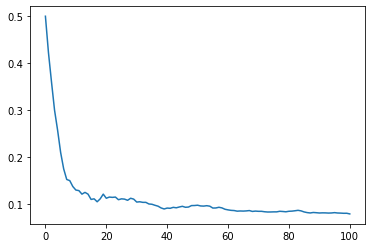

In [38]:
import matplotlib.pyplot as plt
import numpy as np

urnings_matrix = np.zeros((n_player, len(players[0].estimate_container)))
for pl in range(n_player):
    row = players[pl].estimate_container
    urnings_matrix[pl,:] = row

col_means = np.mean(urnings_matrix, axis = 0)
col_var = np.std(urnings_matrix, axis = 0) / np.sqrt(n_player)

col_lower = np.zeros(len(col_means))
col_upper = np.zeros(len(col_means))
for i in range(len(col_means)):
    confint = np.percentile(urnings_matrix[:,i] / player_urn_sizes, [10, 90])
    col_lower[i] = confint[0]
    col_upper[i] = confint[1]



plt.plot(col_means)
#plt.plot(col_means_constant)

0.016
0.01187104039248456
0.019


/Users/bencegergely/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/bencegergely/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


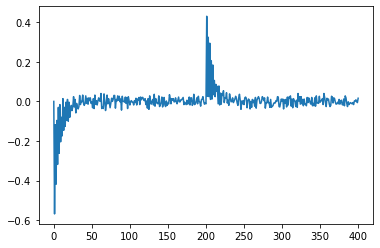

In [39]:
cusum = []
for i in range(len(col_means)):
    if i % 20:
        cusum.append(np.mean(col_means[i-20:i]))


urnings_matrix_diff = np.zeros((n_player, len(players[0].differential_container)))
for pl in range(n_player):
    row = players[pl].differential_container
    urnings_matrix_diff[pl,:] = row

col_means = np.mean(urnings_matrix_diff, axis = 0)

plt.plot(col_means)
conv_stat = col_means
print(np.median(np.abs(col_means)[50:150]))
print(np.std(np.abs(col_means)[50:150]))
print(np.median(np.abs(col_means)[200:250]))

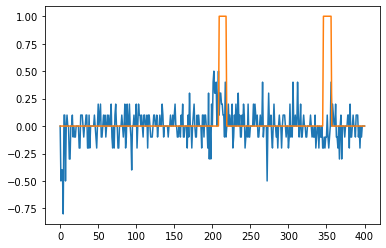

In [14]:
import scipy.stats as sp

signal = []
window = 10
for i in range(len(conv_stat)):
    if window > i:
        signal.append(0)
    elif i >= window:
        w,p = sp.ttest_1samp(conv_stat[i-10:i], 0)
        if p < 0.01:
            signal.append(1)
        else:
            signal.append(0)


plt.plot(conv_stat)
plt.plot(signal)


In [72]:
import numpy as np
import main_urnings as mu
#np.random.seed(12312312)
#game settings
n_player = 100
n_items = 1000
starting_score = 4
player_urn_sizes = 8
item_urn_sizes = 100
n_sim = 180

#true scores for players and items
item_true_values = np.random.uniform(0.1, 0.9, n_items)


#creating players and items
players = []
for i in range(n_player):
    player = mu.Player(user_id = "Student", score = starting_score, urn_size = player_urn_sizes, true_value = 0.1)
    players.append(player)

items = []
for i in range(n_items):
    iname = "item" + str(i)
    starting_score = np.random.binomial(item_urn_sizes, item_true_values[i])
    item = mu.Player(user_id = iname, score = starting_score, urn_size = item_urn_sizes, true_value = item_true_values[i])
    items.append(item)


adaptive_rule = mu.Game_Type(adaptivity="adaptive", alg_type="Urnings2")
adaptive_sim = mu.Urnings(players = players, items = items, game_type=adaptive_rule)
for i in range(int(n_sim / 30)):
    adaptive_sim.play(n_games=30, test=True, urn_change_BETA=True, freq_change=10, min_urn= 8, max_urn = 128, window=10)
    for pl in players:
        pl.true_value = pl.true_value + 0.01
for pl in players:
    pl.true_value = pl.true_value + 0.3
adaptive_sim.play(n_games=n_sim, test=True, urn_change_BETA=True, freq_change=10, min_urn= 8, max_urn = 128, window=10)



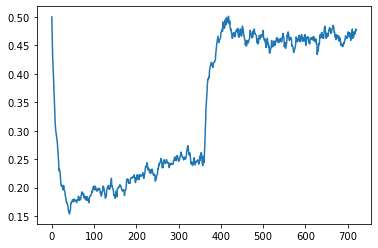

In [73]:
import matplotlib.pyplot as plt
import numpy as np

urnings_matrix = np.zeros((n_player, len(players[0].estimate_container)))
for pl in range(n_player):
    row = players[pl].estimate_container
    urnings_matrix[pl,:] = row

col_means = np.mean(urnings_matrix, axis = 0)
plt.plot(col_means)


0.02
0.019934643212257398
0.02


/Users/bencegergely/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/bencegergely/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


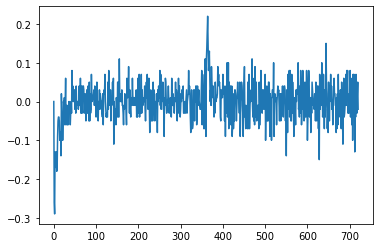

In [74]:
cusum = []
for i in range(len(col_means)):
    if i % 20:
        cusum.append(np.mean(col_means[i-20:i]))


urnings_matrix_diff = np.zeros((n_player, len(players[0].differential_container)))
for pl in range(n_player):
    row = players[pl].differential_container
    urnings_matrix_diff[pl,:] = row

col_means = np.mean(urnings_matrix_diff, axis = 0)

plt.plot(col_means)
conv_stat = col_means
print(np.median(np.abs(col_means)[50:150]))
print(np.std(np.abs(col_means)[50:150]))
print(np.median(np.abs(col_means)[200:250]))

In [1]:
import numpy as np
import main_urnings as mu
import matplotlib.pyplot as plt
#np.random.seed(12312312)
#game settings
n_player = 1
n_items = 1000
starting_score = 2
player_urn_sizes = 4
item_urn_sizes = 100
n_sim = 100
n_urns = 100

#true scores for players and items
item_true_values = np.random.uniform(0.1, 0.9, n_items)


#creating players and items
players = []
for i in range(n_player):
    player = mu.Player(user_id = "Student", score = starting_score, urn_size = player_urn_sizes, true_value = 0.1, multiple_urn=True, n_urns=n_urns)
    players.append(player)

items = []
for i in range(n_items):
    iname = "item" + str(i)
    starting_score = np.random.binomial(item_urn_sizes, item_true_values[i])
    item = mu.Player(user_id = iname, score = starting_score, urn_size = item_urn_sizes, true_value = item_true_values[i])
    items.append(item)


adaptive_rule = mu.Game_Type(adaptivity="n_adaptive", alg_type="Urnings2", multiple_urn=True)
adaptive_sim = mu.Urnings(players = players, items = items, game_type=adaptive_rule)
adaptive_sim.play(n_games=n_sim, test=True)

8 8


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()